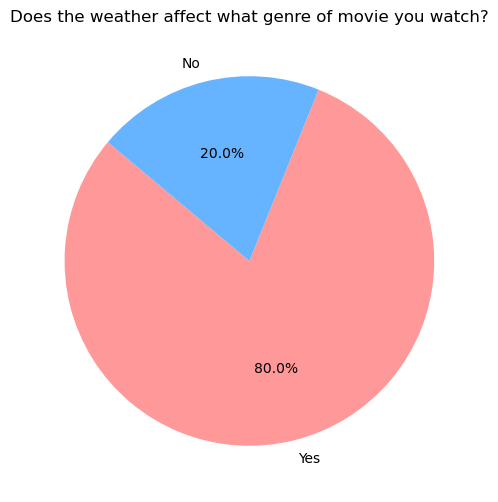

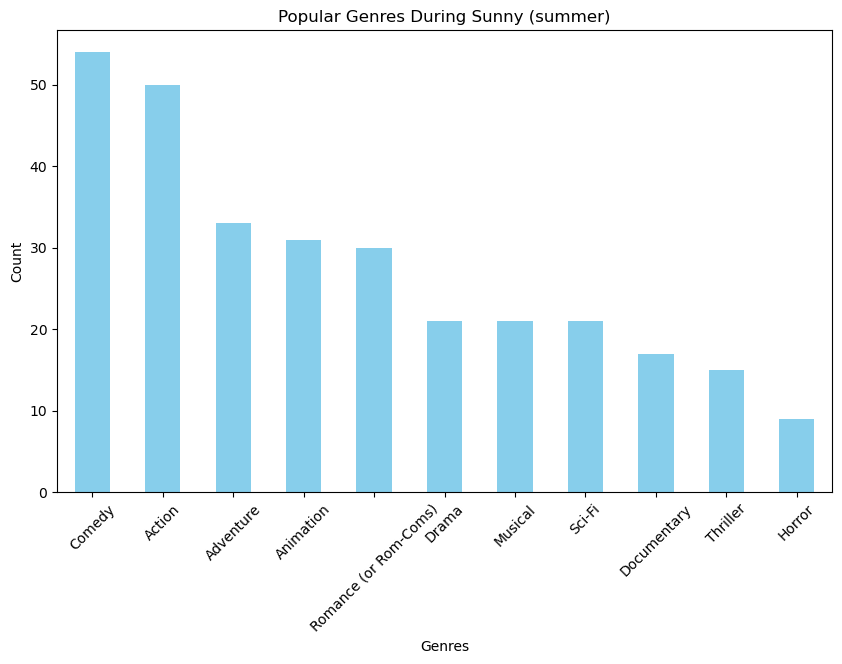

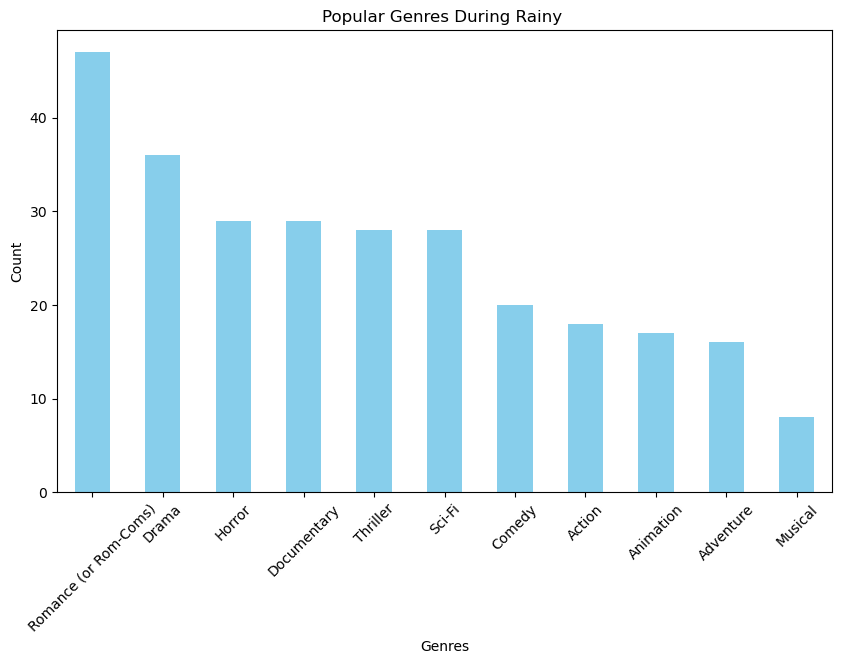

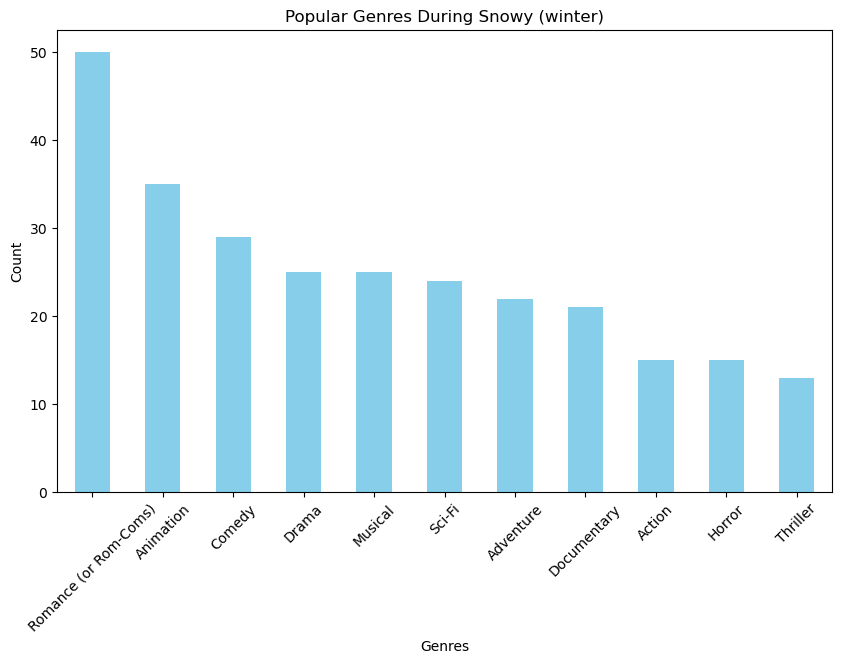

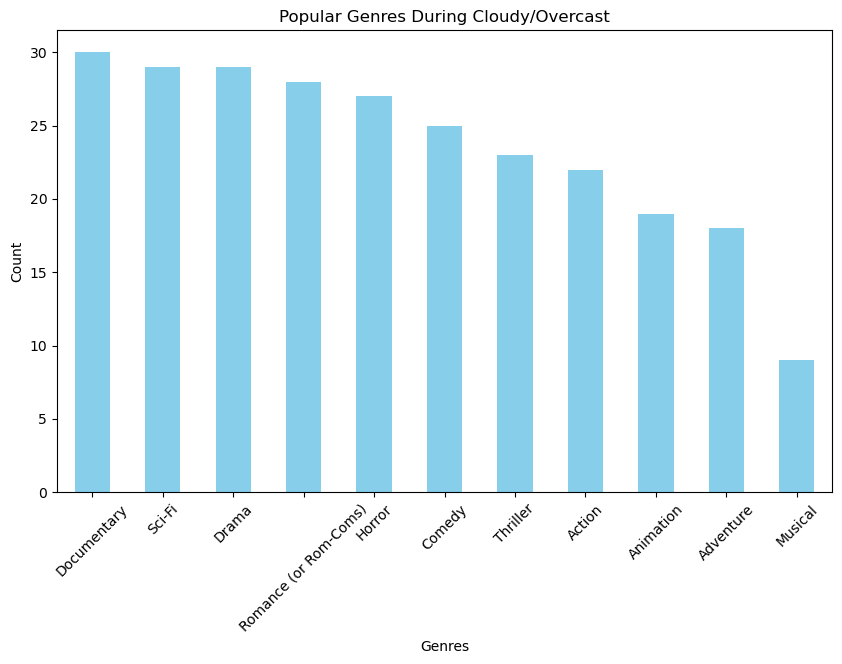

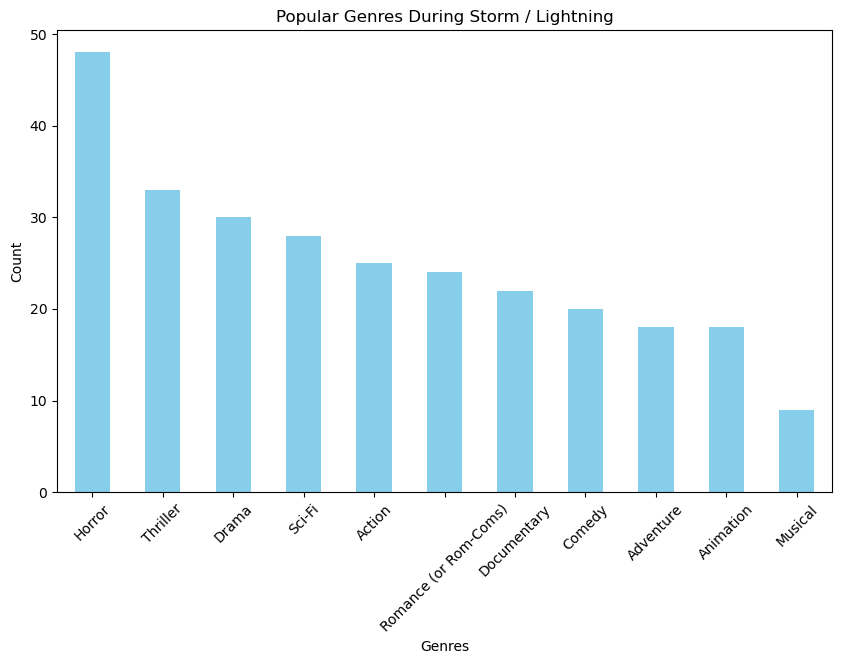

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("/data/Movie Genre based on Weather (Responses) - Form Responses 1.csv")

# 1. Pie chart for "Does the weather affect what genre of movie you watch?"
weather_affect_counts = df["Does the weather affect what genre of movie you watch?"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(weather_affect_counts, labels=weather_affect_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title("Does the weather affect what genre of movie you watch?")
plt.savefig("images/form/pie_weather_affect_genere_answers.png", dpi=300)
plt.show()

# 2. Bar charts for genre distributions in each weather condition

# Define the weather categories
weather_columns = ["Sunny (summer)", "Rainy ", "Snowy (winter)", "Cloudy/Overcast", "Storm / Lightning"]

# Generate bar charts for each weather category
for weather in weather_columns:
    # Split genres by comma, explode to separate rows, and count occurrences
    genre_counts = df[weather].str.split(', ').explode().value_counts()
    
    # Plotting
    plt.figure(figsize=(10, 6))
    genre_counts.plot(kind='bar', color='skyblue')
    plt.title(f"Popular Genres During {weather}")
    plt.xlabel("Genres")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.savefig(f"images/form/popular_genres_during_{weather.replace(' ', '_').replace('/', '_')}.png", dpi=300)
    plt.show()


<Figure size 1200x600 with 0 Axes>

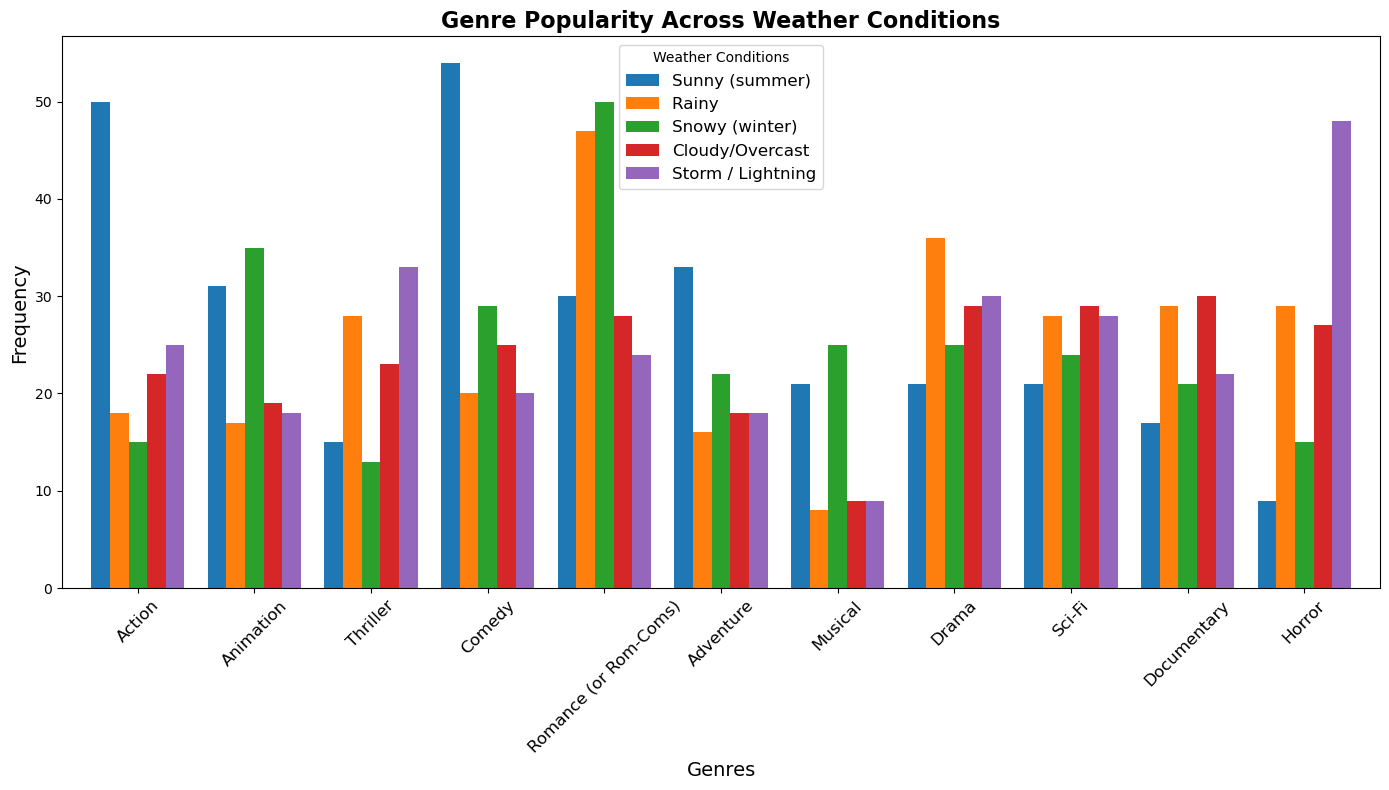

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


# Step 1: Extract and count genres for each weather condition
genre_counts = {weather: Counter() for weather in weather_columns}

for weather in weather_columns:
    for genres in df[weather]:
        if pd.notna(genres):  # Ignore NaN values
            genre_counts[weather].update([genre.strip() for genre in genres.split(',')])

# Step 2: Convert genre counts to a DataFrame
genre_df = pd.DataFrame(genre_counts).fillna(0).astype(int)

# Step 3: Plot the bar chart
plt.figure(figsize=(12, 6))
genre_df.plot(kind='bar', figsize=(14, 8), width=0.8)

plt.title("Genre Popularity Across Weather Conditions", fontsize=16, fontweight='bold')
plt.xlabel("Genres", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Weather Conditions", fontsize=12)
plt.tight_layout()

# Save the plot as an image
plt.savefig("images/form/genre_popularity_bar_chart.png", dpi=300)
plt.show()


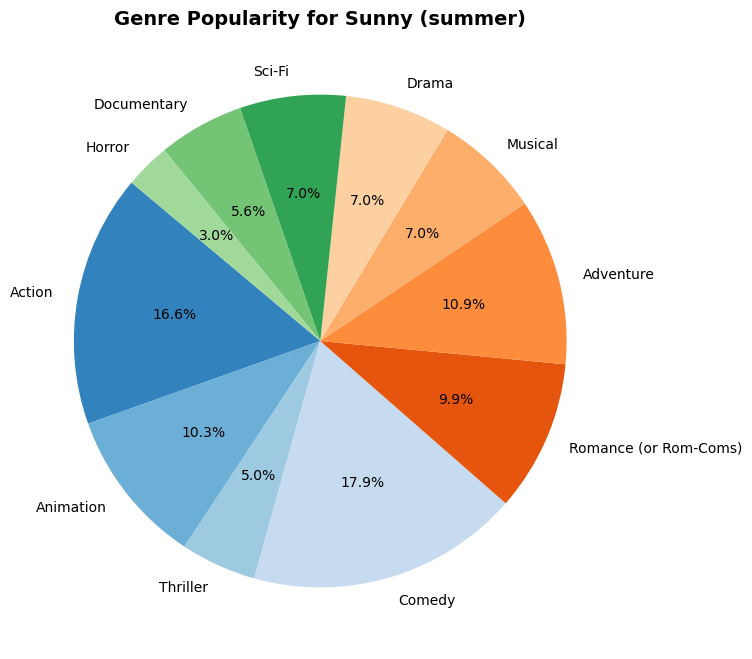

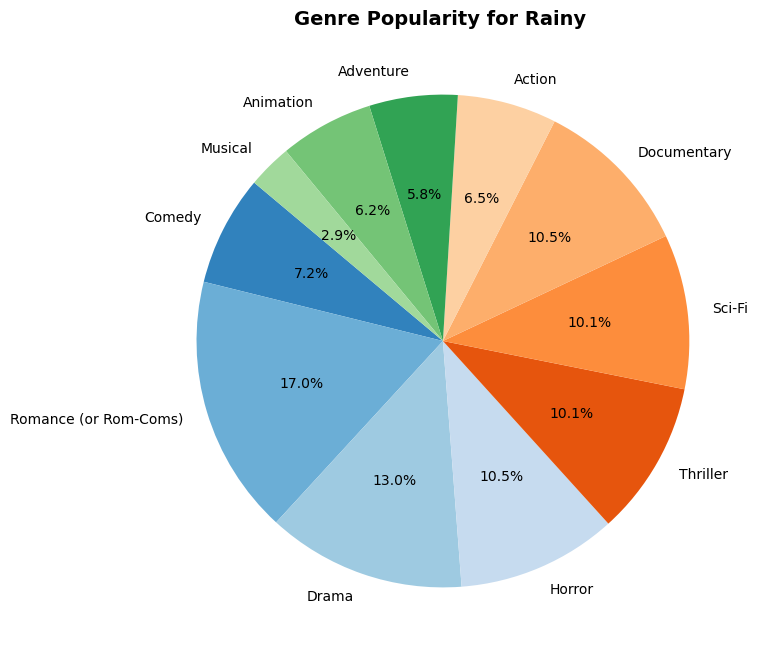

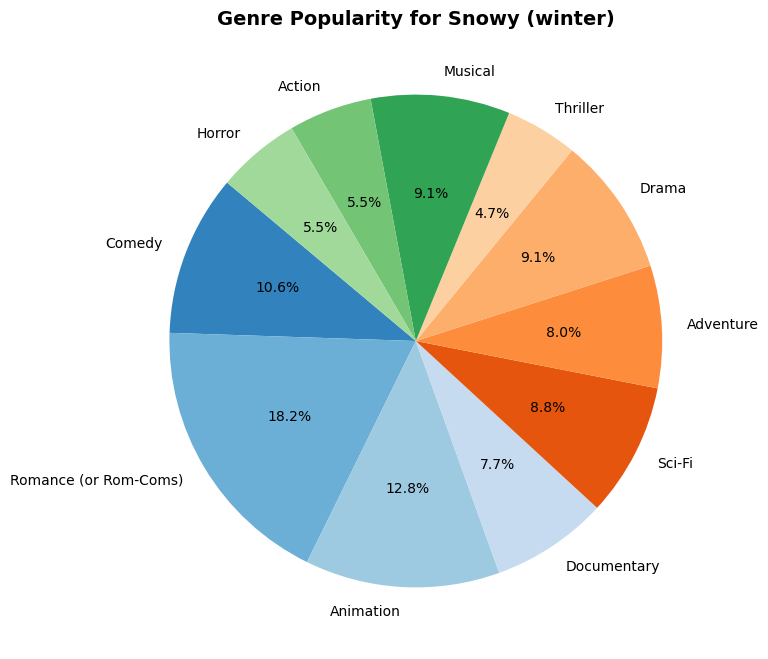

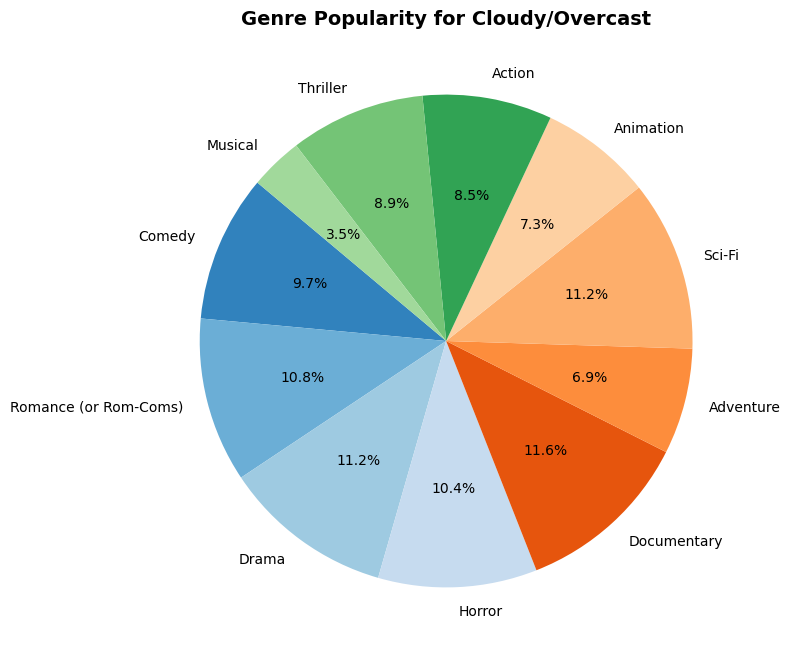

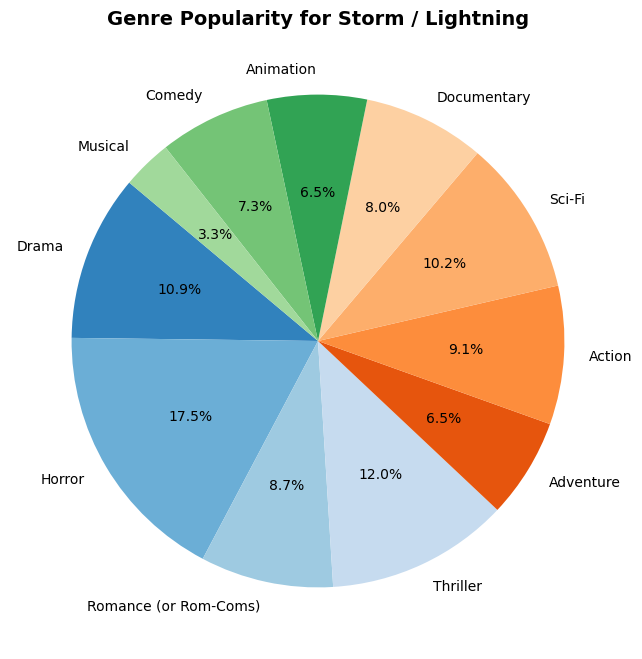

In [88]:
# Choose the weather condition for the pie chart
for weather_condition in weather_columns:
    genre_counter = Counter()
    for genres in df[weather_condition].dropna():
        genre_counter.update([genre.strip() for genre in genres.split(',')])

    labels = genre_counter.keys()
    sizes = genre_counter.values()

    plt.figure(figsize=(8, 8))
    colors = plt.cm.tab20c(range(len(labels)))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f"Genre Popularity for {weather_condition}", fontsize=14, fontweight='bold')
    plt.savefig(f"images/form/pie_chart_{weather_condition.replace(' ', '_').replace('/', '_')}.png", dpi=300)
    plt.show()


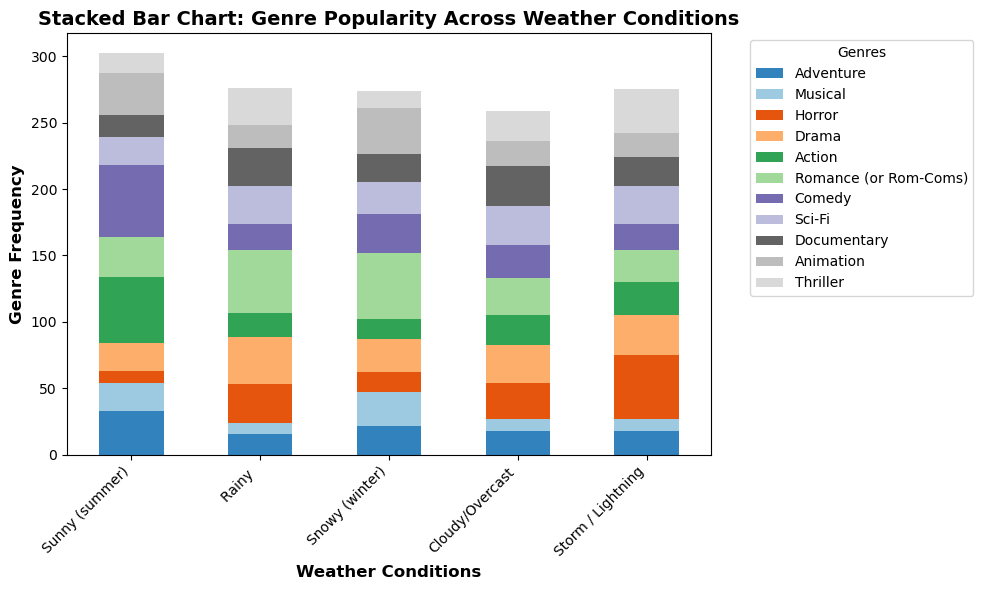

In [89]:
# Initialize a dictionary to collect genre counts by weather condition
weather_genre_data = {}

# Loop through weather columns
for weather_condition in weather_columns:
    genre_counter = Counter()
    for genres in df[weather_condition].dropna():
        genre_counter.update([genre.strip() for genre in genres.split(',')])
    weather_genre_data[weather_condition] = genre_counter

# Create a DataFrame for plotting
all_genres = set(genre for counter in weather_genre_data.values() for genre in counter)
stacked_data = {genre: [weather_genre_data[weather].get(genre, 0) for weather in weather_columns] for genre in all_genres}
stacked_df = pd.DataFrame(stacked_data, index=weather_columns)

# Plotting the stacked bar chart
stacked_df.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab20c")

# Add labels and title
plt.xlabel("Weather Conditions", fontsize=12, fontweight='bold')
plt.ylabel("Genre Frequency", fontsize=12, fontweight='bold')
plt.title("Stacked Bar Chart: Genre Popularity Across Weather Conditions", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10, ha="right")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

# Save and show the chart
plt.tight_layout()
plt.savefig("images/form/stacked_bar_chart.png", dpi=300)
plt.show()

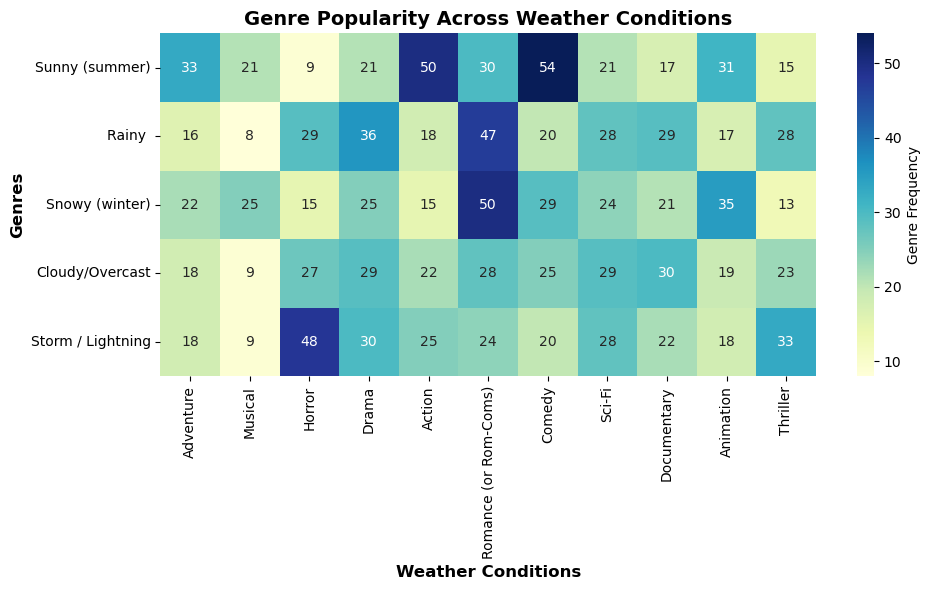

In [90]:
import seaborn as sns

# Initialize a dictionary to collect genre counts by weather condition
weather_genre_data = {}

# Loop through weather columns and count genre occurrences
for weather_condition in weather_columns:
    genre_counter = Counter()
    for genres in df[weather_condition].dropna():
        genre_counter.update([genre.strip() for genre in genres.split(',')])
    weather_genre_data[weather_condition] = genre_counter

# Get all genres that appear in any weather condition
all_genres = set(genre for counter in weather_genre_data.values() for genre in counter)

# Create a DataFrame for the heatmap
heatmap_data = {genre: [weather_genre_data[weather].get(genre, 0) for weather in weather_columns] for genre in all_genres}
heatmap_df = pd.DataFrame(heatmap_data, index=weather_columns)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, fmt='d', cmap="YlGnBu", cbar_kws={'label': 'Genre Frequency'})

# Add labels and title
plt.title("Genre Popularity Across Weather Conditions", fontsize=14, fontweight='bold')
plt.xlabel("Weather Conditions", fontsize=12, fontweight='bold')
plt.ylabel("Genres", fontsize=12, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.savefig("images/form/genre_popularity_heatmap.png", dpi=300)
plt.show()


In [ ]:
import plotly.graph_objects as go

# Initialize a dictionary to collect genre counts by weather condition
weather_genre_data = {}

# Loop through weather columns and count genre occurrences
for weather_condition in weather_columns:
    genre_counter = Counter()
    for genres in df[weather_condition].dropna():
        genre_counter.update([genre.strip() for genre in genres.split(',')])
    weather_genre_data[weather_condition] = genre_counter

# Get all genres that appear in any weather condition
all_genres = set(genre for counter in weather_genre_data.values() for genre in counter)

# Create a DataFrame for the radar chart
radar_data = {genre: [weather_genre_data[weather].get(genre, 0) for weather in weather_columns] for genre in all_genres}
radar_df = pd.DataFrame(radar_data, index=weather_columns)

# Function to create interactive radar chart
def create_interactive_radar_chart(df, title):
    categories = df.columns.tolist()  # Weather conditions (axis labels)
    
    # Create a list of traces (one for each genre)
    traces = []
    for genre in df.index:
        values = df.loc[genre].tolist()
        values += values[:1]  # Close the circle by repeating the first value
        
        trace = go.Scatterpolar(
            r=values, 
            theta=categories,  # Weather conditions as the angles
            fill='toself',
            name=genre
        )
        traces.append(trace)
    
    # Layout for the radar chart
    layout = go.Layout(
        title=title,
        polar=dict(
            radialaxis=dict(showticklabels=False, ticks=''),
            angularaxis=dict(tickmode='array', tickvals=list(range(len(categories))), ticktext=categories)
        ),
        showlegend=True
    )
    
    # Create the figure and plot it
    fig = go.Figure(data=traces, layout=layout)
    fig.show()
    fig.write_html("html/form_interactive_radar_chart.html")


# Create and plot the interactive radar chart
create_interactive_radar_chart(radar_df, "Genre Popularity Across Weather Conditions")


In [ ]:
import plotly.express as px

sunburst_data = []

# Loop through each weather condition (columns except 'Timestamp' and 'Does the weather affect...')
for weather_column in weather_columns:
    for _, row in df.iterrows():
        # Split the genres into a list
        genres = row[weather_column].split(', ')
        for genre in genres:
            # Append a new row for each genre under the specific weather condition
            sunburst_data.append({
                'Weather': weather_column,
                'Genre': genre,
                'Response': row['Does the weather affect what genre of movie you watch?']
            })

# Create a DataFrame for the Sunburst chart
sunburst_df = pd.DataFrame(sunburst_data)

# Create Sunburst chart
fig = px.sunburst(
    sunburst_df,
    path=['Weather', 'Genre', 'Response'],  # Hierarchy of the Sunburst chart
    title="Sunburst Chart: Weather, Genre, and Movie Preferences",
    color='Response',  # Color by 'Response' (Yes or No)
    # color_discrete_map=color_map  # Custom color scale
)

fig.write_html("html/form_answers_sunburst_chart.html")
# Show the interactive plot
fig.show()


In [ ]:
transformed_data = []

# Extract and count genres for each weather condition
for _, row in df.iterrows():
    for weather in weather_columns:
        genres = row[weather].split(', ')  # Split genres by comma
        for genre in genres:
            transformed_data.append({
                'Weather': weather,
                'Genre': genre.strip(),  # Remove any extra spaces
                'Frequency': 1  # Count each occurrence
            })

# Create a new DataFrame with aggregated data
transformed_df = pd.DataFrame(transformed_data)

# Step 2: Aggregate the data to calculate frequencies
bubble_data = transformed_df.groupby(['Weather', 'Genre'], as_index=False).count()

# Add a placeholder for Avg_Rating (or calculate it if you have the data)
bubble_data['Avg_Rating'] = 4.0  # Example static value, replace with actual metric if available

# Step 3: Create the bubble chart
fig = px.scatter(
    bubble_data,
    x='Weather',                # X-axis: Weather
    y='Genre',                  # Y-axis: Genre
    size='Frequency',           # Bubble size: Frequency of the genre
    color='Avg_Rating',         # Bubble color: Average rating (replace with your metric)
    hover_name='Genre',         # Add genre info on hover
    title="Bubble Chart: Genre Frequency by Weather",
    labels={'Frequency': 'Bubble Size'},
    size_max=40                 # Max bubble size
)

# Show the bubble chart
plt.savefig("images/form/genre_frequency_bubble_chart.png", dpi=300)
fig.write_html("html/form_answers_genre_frequency_bubble_chart.html")
fig.show()



<Figure size 640x480 with 0 Axes>

In [ ]:
import plotly.graph_objects as go

sankey_data = []

# Extract genres for each weather condition and create source-target pairs
for _, row in df.iterrows():
    for weather in weather_columns:
        genres = row[weather].split(', ')  # Split genres by comma
        for genre in genres:
            sankey_data.append({
                'Source': weather,
                'Target': genre.strip(),  # Clean up whitespace
                'Value': 1  # Each occurrence counts as 1
            })

# Create a DataFrame from the source-target data
sankey_df = pd.DataFrame(sankey_data)

# Step 2: Aggregate the flow values
sankey_aggregated = sankey_df.groupby(['Source', 'Target'], as_index=False).sum()

# Step 3: Prepare data for the Sankey diagram
sources = list(sankey_aggregated['Source'].unique())
targets = list(sankey_aggregated['Target'].unique())

# Create indices for source and target
all_nodes = sources + targets
source_indices = [all_nodes.index(source) for source in sankey_aggregated['Source']]
target_indices = [all_nodes.index(target) for target in sankey_aggregated['Target']]

# Sankey diagram data
sankey_fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,  # All unique nodes (sources + targets)
        color="blue"  # Color of the nodes
    ),
    link=dict(
        source=source_indices,  # Map source to index
        target=target_indices,  # Map target to index
        value=sankey_aggregated['Value']  # Flow values
    )
)])

# Step 4: Add a title and display the Sankey diagram
sankey_fig.update_layout(
    title_text="Sankey Diagram: Genre Preferences Across Weather Conditions",
    font_size=12
)

fig.write_html("html/form_genre_prefrences_sankey_diagram.html")
sankey_fig.show()
